In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [4]:
import pathlib
data_dir = pathlib.Path('C:/Users/hs298/Desktop/Projects/Deep Learning/Flower/datasets/flower_photos/flower_photos')


In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/hs298/Desktop/Projects/Deep Learning/Flower/datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/hs298/Desktop/Projects/Deep Learning/Flower/datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/hs298/Desktop/Projects/Deep Learning/Flower/datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/hs298/Desktop/Projects/Deep Learning/Flower/datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/hs298/Desktop/Projects/Deep Learning/Flower/datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('C:/Users/hs298/Desktop/Projects/Deep Learning/Flower/datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/hs298/Desktop/Projects/Deep Learning/Flower/datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/hs298/Desktop/Projects/Deep Learning/Flower/datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/hs298/Desktop/Projects/Deep Learning/Flower/datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/hs298/Desktop/Projects/Deep Learning/Flower/datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

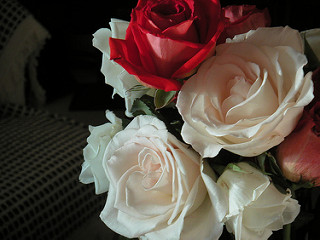

In [8]:
PIL.Image.open(str(roses[1]))

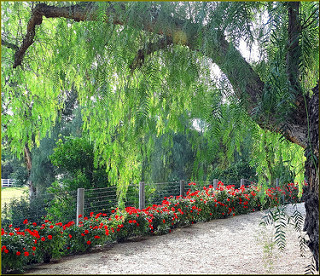

In [9]:
PIL.Image.open(str(roses[5]))

In [10]:
flowers_image_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))

}

In [75]:
flowers_label_dict = {
    0: 'roses',
    1: 'daisy',
    2: 'dandelion',
    3: 'sunflowers',
    4: 'tulips'
}

In [12]:
for i in range (10):
    print(str(flowers_image_dict['roses'][i]))

C:\Users\hs298\Desktop\Projects\Deep Learning\Flower\datasets\flower_photos\flower_photos\roses\10090824183_d02c613f10_m.jpg
C:\Users\hs298\Desktop\Projects\Deep Learning\Flower\datasets\flower_photos\flower_photos\roses\102501987_3cdb8e5394_n.jpg
C:\Users\hs298\Desktop\Projects\Deep Learning\Flower\datasets\flower_photos\flower_photos\roses\10503217854_e66a804309.jpg
C:\Users\hs298\Desktop\Projects\Deep Learning\Flower\datasets\flower_photos\flower_photos\roses\10894627425_ec76bbc757_n.jpg
C:\Users\hs298\Desktop\Projects\Deep Learning\Flower\datasets\flower_photos\flower_photos\roses\110472418_87b6a3aa98_m.jpg
C:\Users\hs298\Desktop\Projects\Deep Learning\Flower\datasets\flower_photos\flower_photos\roses\11102341464_508d558dfc_n.jpg
C:\Users\hs298\Desktop\Projects\Deep Learning\Flower\datasets\flower_photos\flower_photos\roses\11233672494_d8bf0a3dbf_n.jpg
C:\Users\hs298\Desktop\Projects\Deep Learning\Flower\datasets\flower_photos\flower_photos\roses\11694025703_9a906fedc1_n.jpg
C:\Use

In [13]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))

In [14]:
img.shape

(240, 179, 3)

In [15]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [16]:
X = []
y = []

missing_labels = 0
skipped_images = 0


In [17]:
for flower_name, images in flowers_image_dict.items():
    # Check if the label exists for this flower_name
    if flower_name not in flowers_label_dict:
        missing_labels += len(images)
        continue

    for image in images:
        img = cv2.imread(str(image))
        if img is None:
            skipped_images += 1
            
            continue

        resized_img = cv2.resize(img, (180, 180))
        X.append(resized_img)
        y.append(flowers_label_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")


Length of X: 3670
Length of y: 3670


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split( X , y ,random_state = 0)

In [20]:
X_train = X_train/255
X_test = X_test/255

In [21]:
num_classes = 5 
model = Sequential([
    layers.Conv2D(16,3, padding = 'same' , activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding = 'same' , activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding = 'same' ,activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128 , activation = 'relu'),
    layers.Dense(num_classes)
])

In [22]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.fit(X_train,y_train,epochs = 20)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - accuracy: 0.3001 - loss: 1.6717
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.6137 - loss: 0.9942
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.6579 - loss: 0.8948
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.7671 - loss: 0.6369
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.8566 - loss: 0.4378
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.9217 - loss: 0.2484
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.9661 - loss: 0.1317
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.9795 - loss: 0.0883
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.9870 - loss: 0.0713
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.9783 - loss: 0.0680
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.9945 - loss: 0.0301
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 11

In [24]:
model.evaluate(X_test,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5858 - loss: 2.7134


[2.8117194175720215, 0.587145984172821]

# Model is overfitted

## this adds a extra layer which makes the images vary contrast and flip the images and zoom the images 
## doing this makes the model see differeent variety of images and learn the details

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_aug = Sequential(
    [
        RandomFlip("horizontal", input_shape=(180, 180, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1),
    ]
)


C:\Users\hs298\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


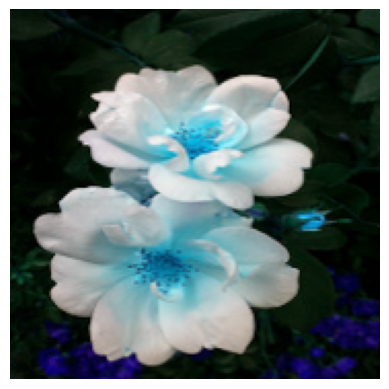

In [26]:
plt.axis('off')
plt.imshow(X[0])

In [27]:
num_classes = 5

model = Sequential([
  data_aug,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
 

In [28]:
model.fit(X_train, y_train, epochs=100) 

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.3585 - loss: 1.4537
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.5888 - loss: 1.0622
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.6345 - loss: 0.9190
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.6779 - loss: 0.8612
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - accuracy: 0.7007 - loss: 0.8086
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.7186 - loss: 0.7515
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.7213 - loss: 0.7226
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.7491 - loss: 0.6674
Epoch 9/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 166ms/step - accuracy: 0.7560 - loss: 0.6457
Epoch 10/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - accuracy: 0.7717 - loss: 0.6079
Epoch 11/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 163ms/step - accuracy: 0.7797 - loss: 0.6172
Epoch 12/100
86/86 ━━━━━━━━━━━

In [29]:
model.evaluate(X_test,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7406 - loss: 1.9743


[1.967091679573059, 0.7472766637802124]

In [50]:
img = 'C:/Users/hs298/Desktop/Projects/Deep Learning/Flower/datasets/flower_photos/flower_photos/dandelion/8181477_8cb77d2e0f_n.jpg'

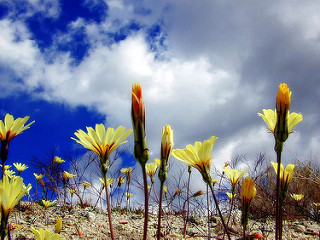

In [51]:
PIL.Image.open(img)

In [103]:
def pred_flower(img):
    image = cv2.imread(img)
    image = cv2.resize(image, (180, 180))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    pred = model.predict(image)                
    out = np.argmax(pred)
    label = flowers_label_dict[int(out)]
    return label


In [106]:
def cheak(img):
    out = pred_flower(img)
    print (out)

In [108]:
img = 'C:/Users/hs298/'
path = input()
img = img+path
PIL.Image.open(img)
cheak(img)

 Desktop/Projects/Deep Learning/Flower/datasets/flower_photos/OIP.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
roses


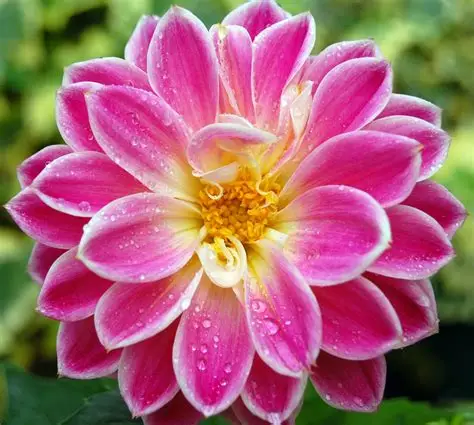

In [109]:
PIL.Image.open(img)

In [122]:
img = 'C:/Users/hs298/'
path = input()
img = img+path
ans = cheak(img)

 Desktop/Projects/Deep Learning/Flower/datasets/flower_photos/flower_photos/sunflowers/23286304156_3635f7de05.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
sunflowers


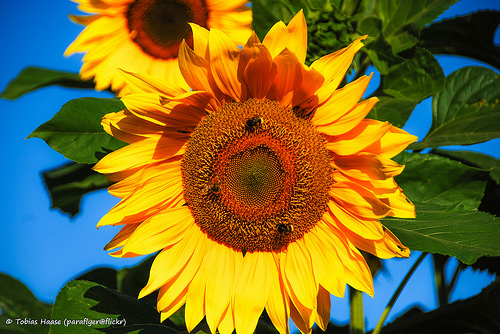

In [116]:
PIL.Image.open(img)